In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

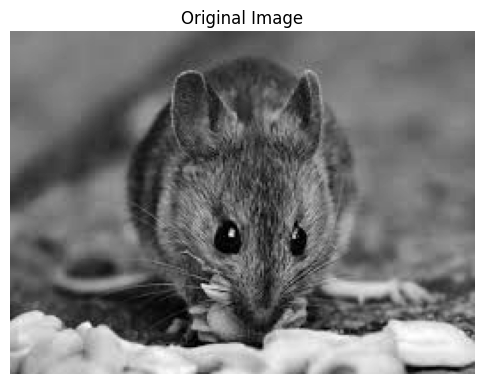

In [3]:
img = cv2.imread('./image.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

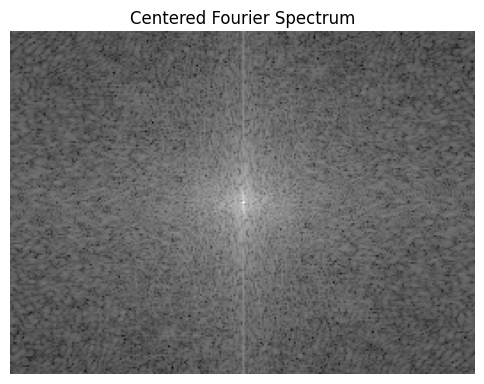

In [4]:
f_transform = np.fft.fft2(img)

f_transform_shifted = np.fft.fftshift(f_transform)

magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Centered Fourier Spectrum')
plt.axis('off')
plt.show()

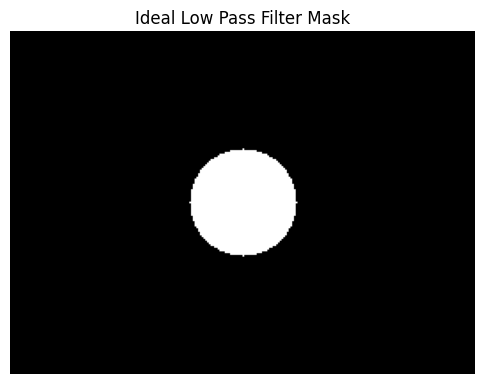

In [5]:
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2

D0_low = 30 

ilpf_mask = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - crow)**2 + (j - ccol)**2)
        if D <= D0_low:
            ilpf_mask[i, j] = 1

ilpf_applied = f_transform_shifted * ilpf_mask

plt.figure(figsize=(6, 6))
plt.imshow(ilpf_mask, cmap='gray')
plt.title('Ideal Low Pass Filter Mask')
plt.axis('off')
plt.show()

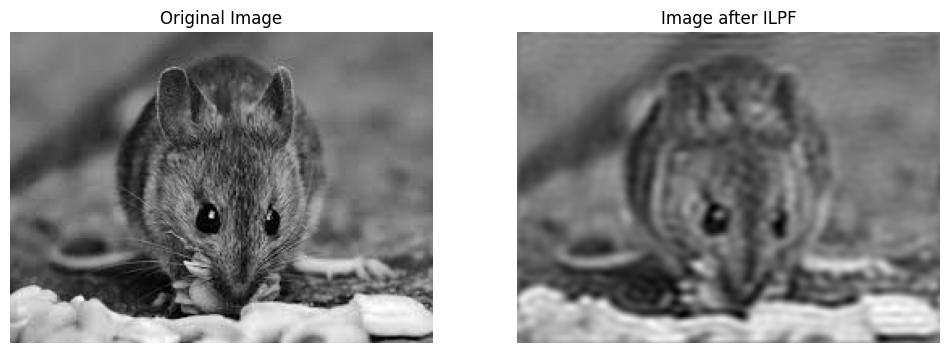

In [6]:
f_ishift_low = np.fft.ifftshift(ilpf_applied)

img_back_low = np.fft.ifft2(f_ishift_low)
img_back_low = np.real(img_back_low)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back_low, cmap='gray')
plt.title('Image after ILPF')
plt.axis('off')

plt.show()

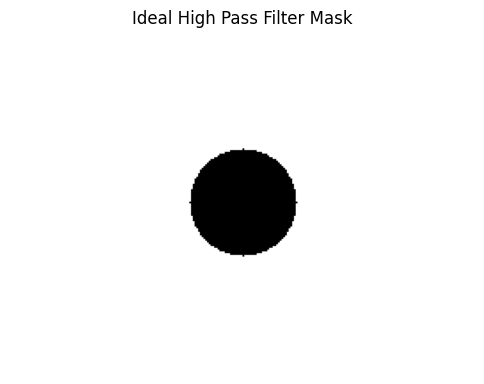

In [7]:
ihpf_mask = 1 - ilpf_mask

ihpf_applied = f_transform_shifted * ihpf_mask

plt.figure(figsize=(6, 6))
plt.imshow(ihpf_mask, cmap='gray')
plt.title('Ideal High Pass Filter Mask')
plt.axis('off')
plt.show()

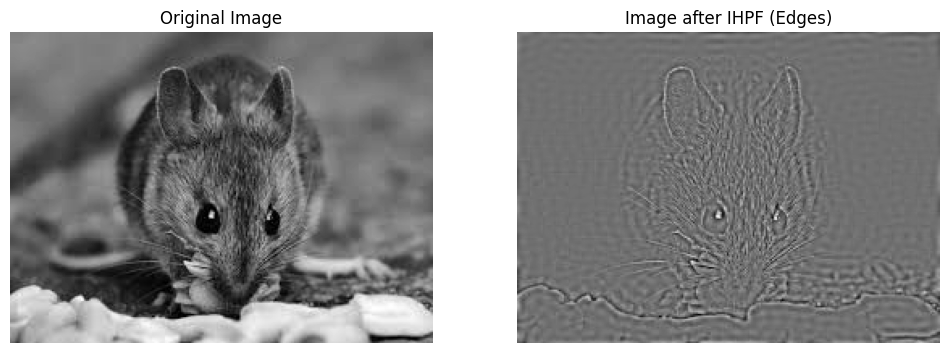

In [8]:
f_ishift_high = np.fft.ifftshift(ihpf_applied)

img_back_high = np.fft.ifft2(f_ishift_high)
img_back_high = np.real(img_back_high)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back_high, cmap='gray')
plt.title('Image after IHPF (Edges)')
plt.axis('off')

plt.show()